In [ ]:
import pandas as pd

# Path to the uploaded file
file_path = '/content/Train Delayed datsets-1.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

# Optional: Check basic info about the dataset
print("\nDataset Info:")
print(df.info())


                                                   S.No.;Started Date;End Date;Train Number;Train Name;Route;Scheduled Departure;Actual Departure;Scheduled Arrival;Actual Arrival;Duration(hrs.);Delay Duration (Min);Delay Reason;Remarks;Travel Distance
1;Wed 01 Jan;Wed 01 Jan;12367;Vikramshila Expre...   Arrival: 192 min late;Got late Signal and arr...                                                                                                                                                      
2;Sun 05 Jan;Sun 05 Jan;12367;Vikramshila Expre...   Arrival: 123 min late;Got late Signal and arr...                                                                                                                                                      
3;Fri 10 Jan;Fri 10 Jan;12367;Vikramshila Expre...   Arrival: 332 min late;Got late Signal and arr...                                                                                                                                               

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Read the CSV safely
file_path = '/content/Train Delayed datsets-1.csv'

# Read CSV with error handling
df = pd.read_csv(file_path, on_bad_lines='skip')

# Step 2: Handling Missing Values
# Check for missing values
print("Missing Values Before:\n", df.isnull().sum())

# Fill missing values (example strategies)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('Unknown')   # For text columns
    else:
        df[col] = df[col].fillna(df[col].median())  # For numerical columns

print("\nMissing Values After:\n", df.isnull().sum())

# Step 3: Transformations
# Example: Lowercase all text columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower()

# Example: Strip spaces
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

# Step 4: Feature Engineering
# Example: Create a new feature - Delay Category
# (Assuming you have a 'Delay (minutes)' column)

if 'Delay (minutes)' in df.columns:
    def delay_category(x):
        if x < 10:
            return 'Short'
        elif x < 30:
            return 'Medium'
        else:
            return 'Long'

    df['Delay Category'] = df['Delay (minutes)'].apply(delay_category)

# Step 5: Data Preparation
# Encode categorical variables if needed
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Final dataset
print("\nPrepared Data:\n")
print(df.head())

# Save the preprocessed data
df.to_csv('/content/Train Delayed datsets-1.csv', index=False)
print("\nPreprocessed file saved as 'Preprocessed_Train_Delayed.csv'")


Missing Values Before:
 S.No.;Started Date;End Date;Train Number;Train Name;Route;Scheduled Departure;Actual Departure;Scheduled Arrival;Actual Arrival;Duration(hrs.);Delay Duration (Min);Delay Reason;Remarks;Travel Distance    17
dtype: int64

Missing Values After:
 S.No.;Started Date;End Date;Train Number;Train Name;Route;Scheduled Departure;Actual Departure;Scheduled Arrival;Actual Arrival;Duration(hrs.);Delay Duration (Min);Delay Reason;Remarks;Travel Distance    0
dtype: int64

Prepared Data:

                                                    S.No.;Started Date;End Date;Train Number;Train Name;Route;Scheduled Departure;Actual Departure;Scheduled Arrival;Actual Arrival;Duration(hrs.);Delay Duration (Min);Delay Reason;Remarks;Travel Distance
1;Wed 01 Jan;Wed 01 Jan;12367;Vikramshila Expre...                                                 89                                                                                                                                              

===== Summary Statistics =====
       S.No.;Started Date;End Date;Train Number;Train Name;Route;Scheduled Departure;Actual Departure;Scheduled Arrival;Actual Arrival;Duration(hrs.);Delay Duration (Min);Delay Reason;Remarks;Travel Distance
count                                         350.000000                                                                                                                                                       
mean                                          137.057143                                                                                                                                                       
std                                            79.193117                                                                                                                                                       
min                                             0.000000                                                                                 

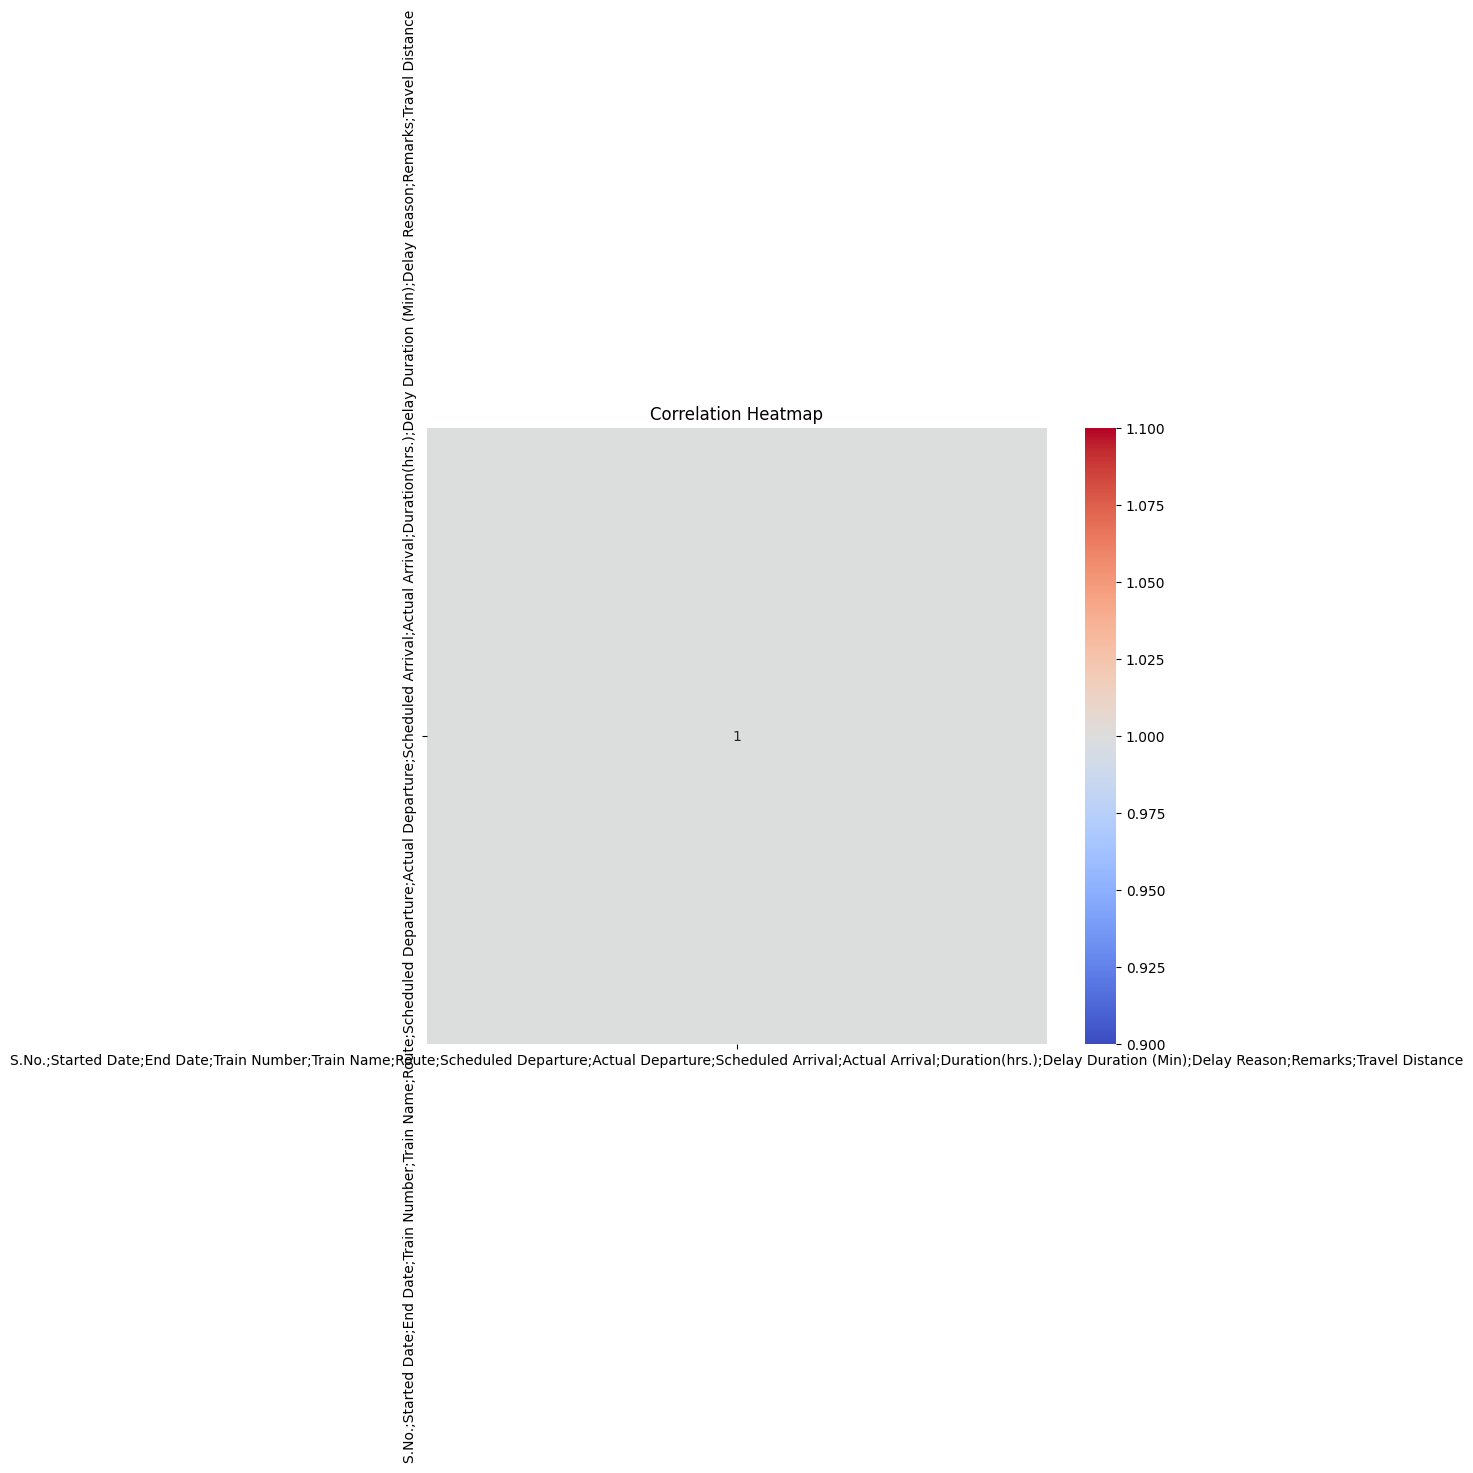

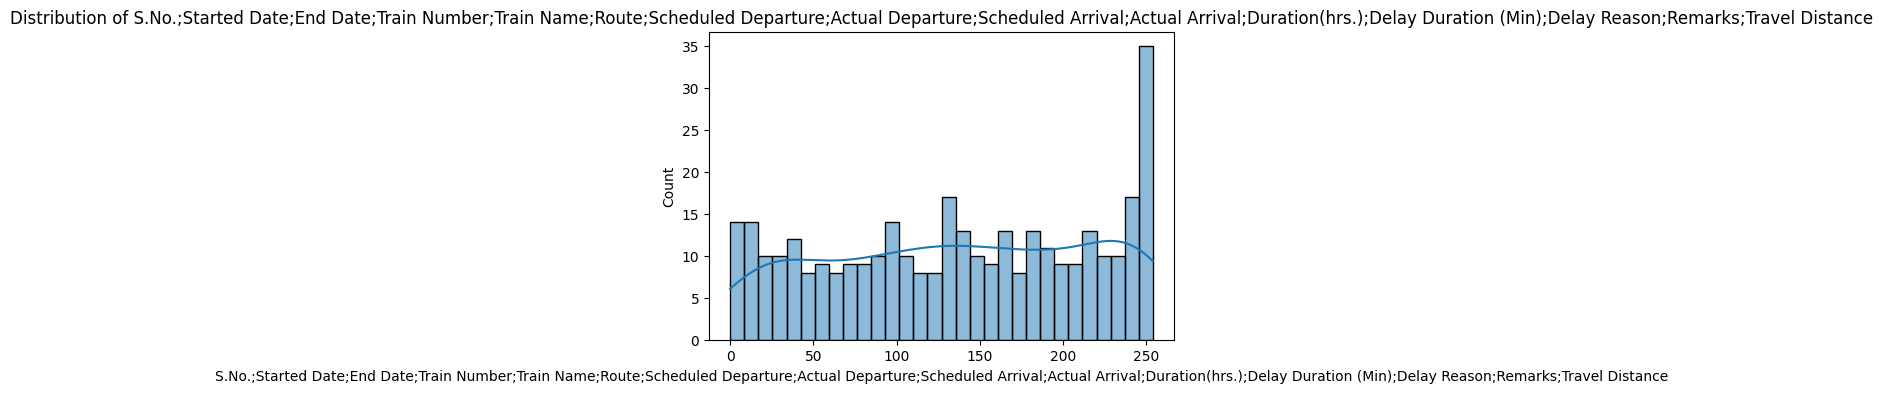

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Preprocessed Data
file_path = '/content/Train Delayed datsets-1.csv'
df = pd.read_csv(file_path)

# Step 2: Summary Statistics
print("===== Summary Statistics =====")
print(df.describe(include='all'))

# Step 3: Data Shape and Basic Info
print("\n===== Dataset Shape =====")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n===== Data Types =====")
print(df.dtypes)

# Step 4: Check for Missing Values Again
print("\n===== Missing Values =====")
print(df.isnull().sum())

# Step 5: Correlation Matrix
print("\n===== Correlation Matrix =====")
correlation = df.corr()
print(correlation)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 6: Univariate Analysis
# Plot distributions for numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Step 7: Categorical Analysis
# Plot bar plots for categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Step 8: Bivariate Analysis
# Example: Delay Category vs other features if Delay Category exists
if 'Delay Category' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='Delay Category', data=df, palette='Set2')
    plt.title('Train Delay Categories')
    plt.show()

# Step 9: Trends / Patterns
# Example: If you have 'Day of Week' or 'Station Name' columns
# Replace 'day_of_week' and 'station_name' with real column names if available

if 'Day of Week' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Day of Week', y='Delay (minutes)', data=df)
    plt.title('Delay Distribution by Day of Week')
    plt.show()

if 'Station Name' in df.columns:
    plt.figure(figsize=(10,6))
    top_stations = df['Station Name'].value_counts().head(10).index
    sns.barplot(x='Station Name', y='Delay (minutes)', data=df[df['Station Name'].isin(top_stations)])
    plt.title('Top 10 Stations by Average Delay')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
!pip install --upgrade numpy
!pip install --upgrade pmdarima


ADF Statistic: -3.357776686973677
p-value: 0.012485287460860455


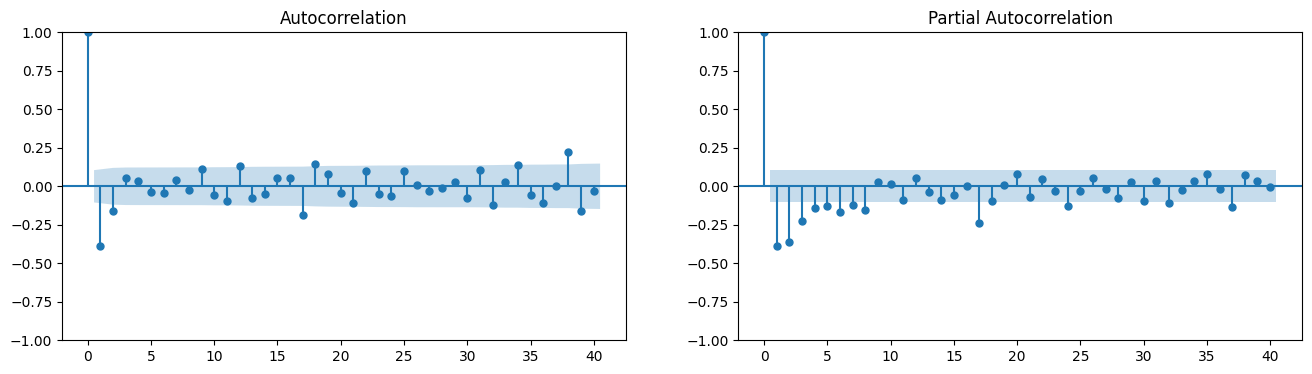

                                                                                                                          SARIMAX Results                                                                                                                           
Dep. Variable:     S.No.;Started Date;End Date;Train Number;Train Name;Route;Scheduled Departure;Actual Departure;Scheduled Arrival;Actual Arrival;Duration(hrs.);Delay Duration (Min);Delay Reason;Remarks;Travel Distance   No. Observations:                  350
Model:                                                                                                                                                                                                       ARIMA(1, 1, 1)   Log Likelihood               -2010.991
Date:                                                                                                                                                                                                      Tue, 08 Apr 20

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Load your cleaned data
file_path = '/content/Train Delayed datsets-1.csv'
y = pd.read_csv(file_path)



# Step 1: Check stationarity
result = adfuller(y.dropna())  # dropna in case of missing values
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Step 2: Differencing if needed
y_diff = y.diff().dropna()

# Step 3: Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16,4))
sm.graphics.tsa.plot_acf(y_diff, lags=40, ax=axes[0])
sm.graphics.tsa.plot_pacf(y_diff, lags=40, ax=axes[1])
plt.show()

# Step 4: Choose p,d,q
# For now, let's assume:
p = 1   # AR terms from PACF plot
d = 1   # differencing (because p-value > 0.05)
q = 1   # MA terms from ACF plot

# Step 5: Fit ARIMA
model = sm.tsa.ARIMA(y, order=(p, d, q))
model_fit = model.fit()

print(model_fit.summary())

# Step 6: Forecast
forecast = model_fit.forecast(steps=30)
print(forecast)


ADF Statistic: -3.357776686973677
p-value: 0.012485287460860455

Data is stationary, no differencing needed.



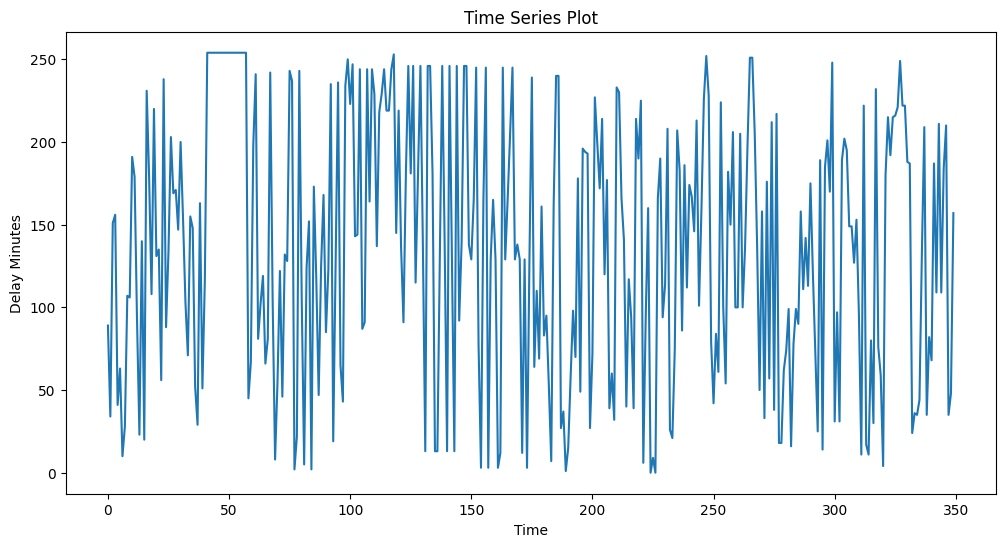

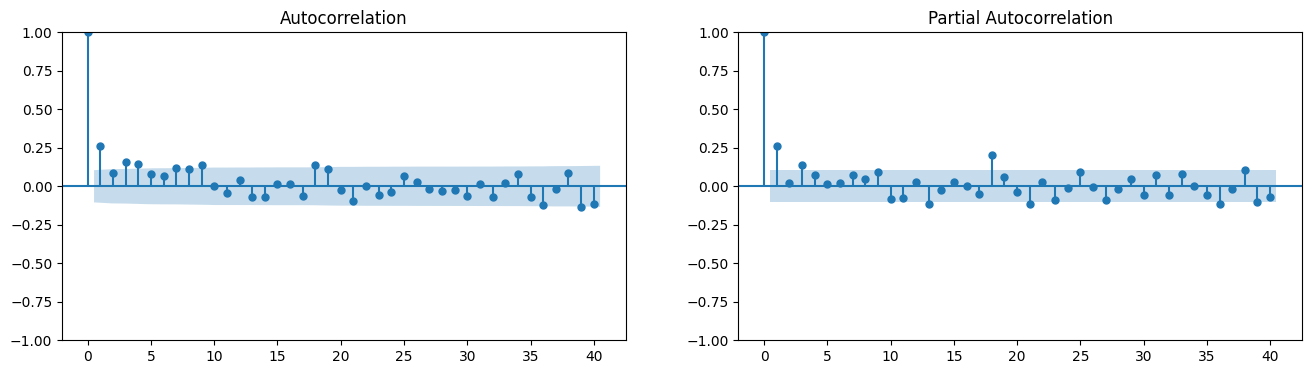

                                                                                                                          SARIMAX Results                                                                                                                           
Dep. Variable:     S.No.;Started Date;End Date;Train Number;Train Name;Route;Scheduled Departure;Actual Departure;Scheduled Arrival;Actual Arrival;Duration(hrs.);Delay Duration (Min);Delay Reason;Remarks;Travel Distance   No. Observations:                  350
Model:                                                                                                                                                                                                       ARIMA(1, 1, 1)   Log Likelihood               -2010.991
Date:                                                                                                                                                                                                      Tue, 08 Apr 20

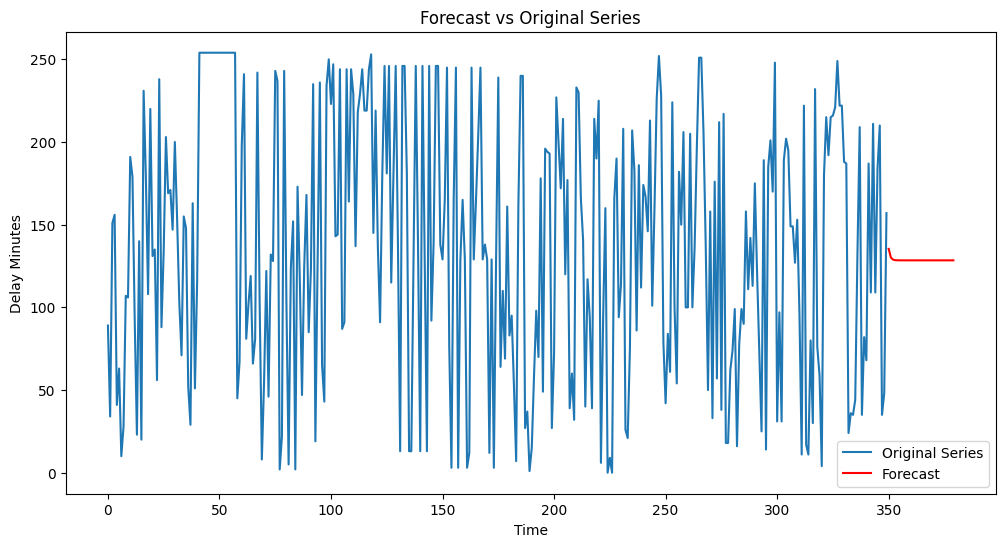

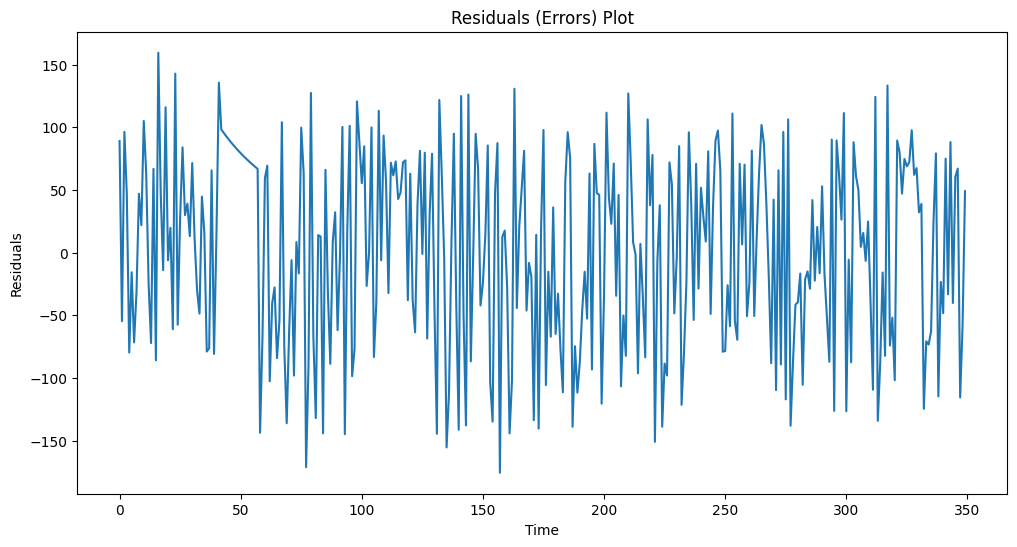

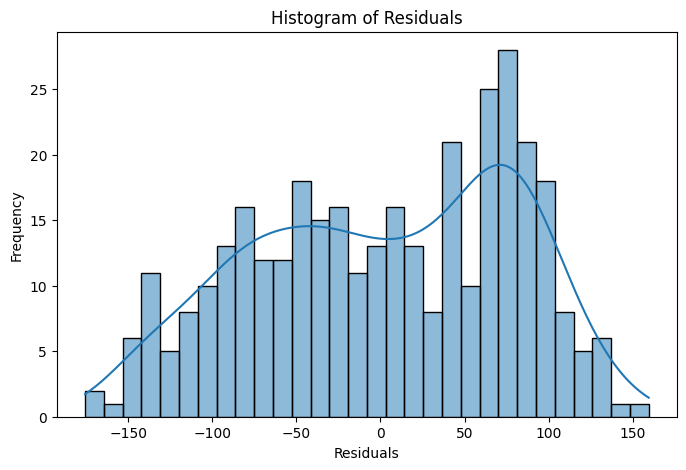

<Figure size 800x500 with 0 Axes>

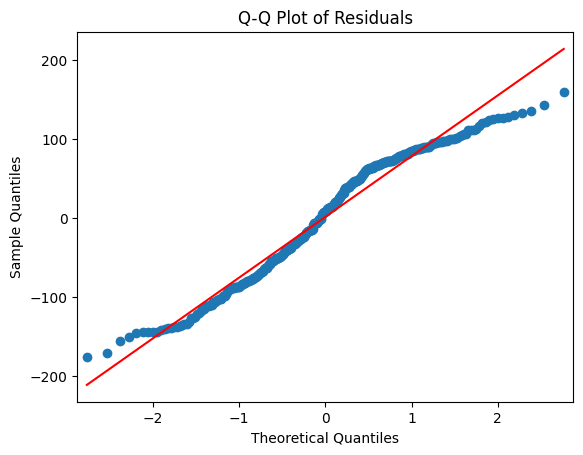

In [ ]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import scipy.stats as stats

# --- Load Data ---
file_path = '/content/Train Delayed datsets-1.csv'  # <-- Update path if needed
y = pd.read_csv(file_path)

# --- Select Time Series Column ---
# Assuming you have a 'Delay_Minutes' or similar column


# --- Check for Stationarity ---
result = adfuller(y)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# --- Differencing if Needed ---
if result[1] > 0.05:
    print("\nData is non-stationary, applying differencing...\n")
    y = y.diff().dropna()
else:
    print("\nData is stationary, no differencing needed.\n")

# --- Plot the Time Series ---
plt.figure(figsize=(12,6))
plt.plot(y)
plt.title('Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Delay Minutes')
plt.show()

# --- Plot ACF and PACF ---
fig, axes = plt.subplots(1, 2, figsize=(16,4))
sm.graphics.tsa.plot_acf(y, lags=40, ax=axes[0])
sm.graphics.tsa.plot_pacf(y, lags=40, ax=axes[1])
plt.show()

# --- Set (p,d,q) values ---
p = 1  # <--- You need to decide based on PACF plot
d = 1  # <--- Differencing order
q = 1  # <--- You need to decide based on ACF plot

# --- Fit ARIMA Model ---
model = sm.tsa.ARIMA(y, order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

# --- Forecast Future Values ---
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# --- Plot Forecast ---
plt.figure(figsize=(12,6))
plt.plot(y, label='Original Series')
plt.plot(np.arange(len(y), len(y)+forecast_steps), forecast, label='Forecast', color='red')
plt.title('Forecast vs Original Series')
plt.xlabel('Time')
plt.ylabel('Delay Minutes')
plt.legend()
plt.show()

# --- Residual Diagnostics ---
residuals = model_fit.resid

# 1. Residual Plot
plt.figure(figsize=(12,6))
plt.plot(residuals)
plt.title('Residuals (Errors) Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# 2. Histogram of Residuals
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 3. Q-Q Plot
plt.figure(figsize=(8,5))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


Columns in CSV: Index(['S.No.;Started Date;End Date;Train Number;Train Name;Route;Scheduled Departure;Actual Departure;Scheduled Arrival;Actual Arrival;Duration(hrs.);Delay Duration (Min);Delay Reason;Remarks;Travel Distance'], dtype='object')
  S.No.;Started Date;End Date;Train Number;Train Name;Route;Scheduled Departure;Actual Departure;Scheduled Arrival;Actual Arrival;Duration(hrs.);Delay Duration (Min);Delay Reason;Remarks;Travel Distance  \
0   Arrival: 192 min late;Got late Signal and arr...                                                                                                                                                         
1   Arrival: 123 min late;Got late Signal and arr...                                                                                                                                                         
2   Arrival: 332 min late;Got late Signal and arr...                                                                                      

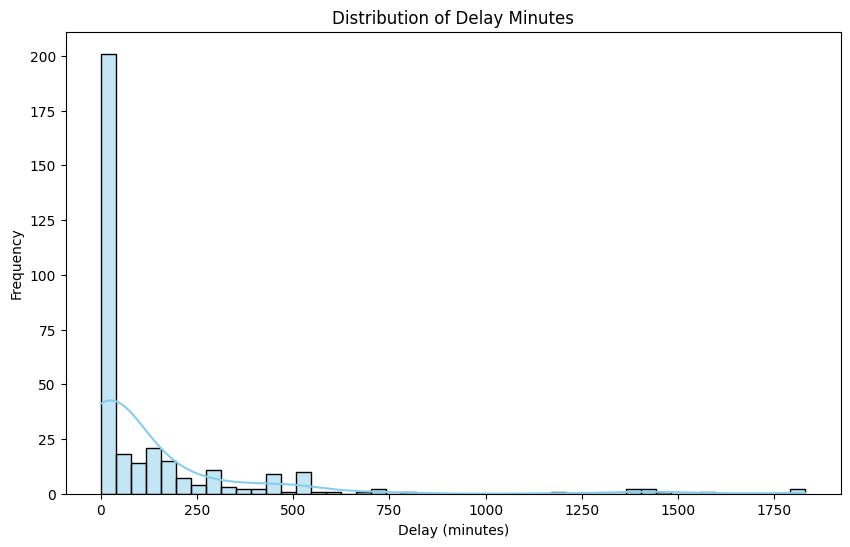

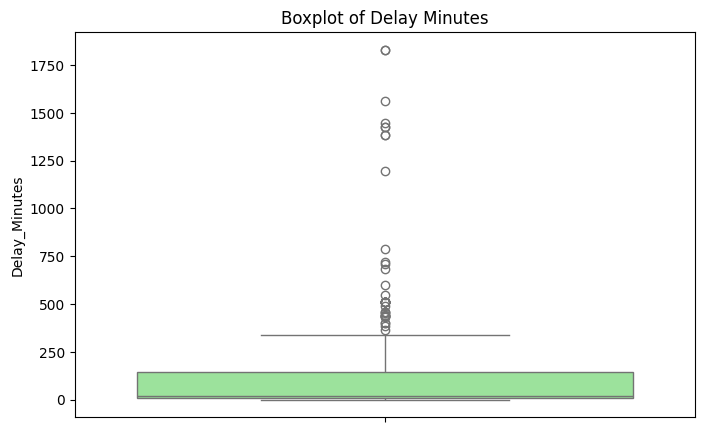

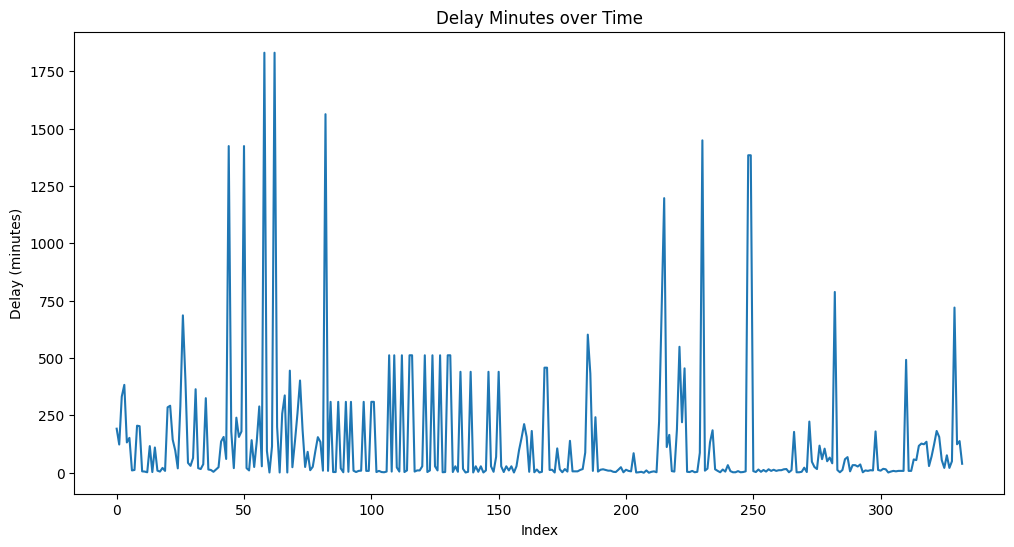

ADF Statistic: -16.657551132040847
p-value: 1.584419573877775e-29


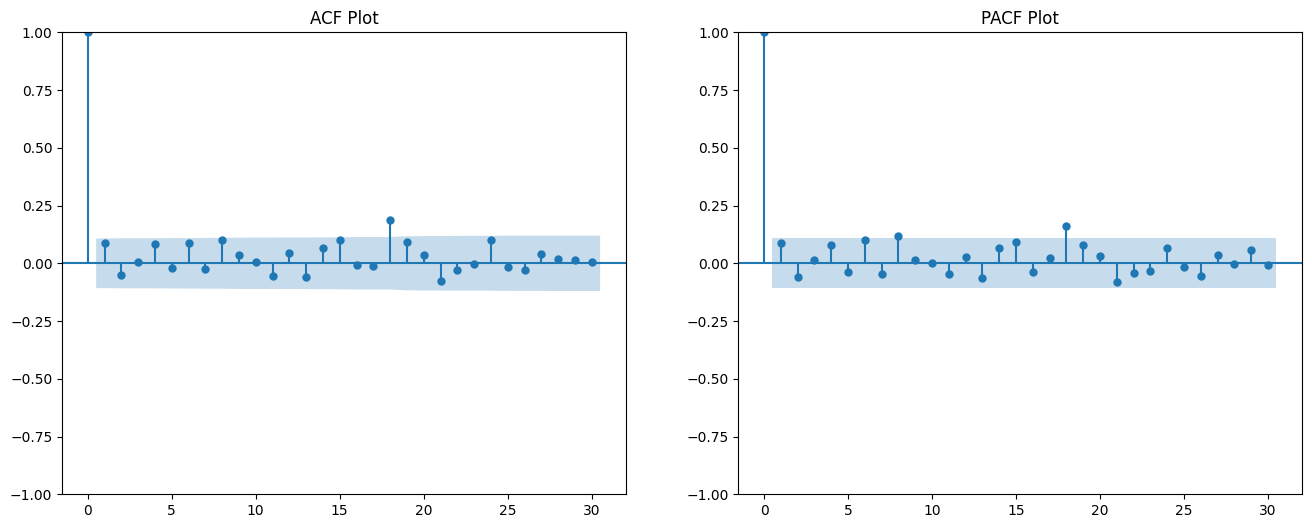

                               SARIMAX Results                                
Dep. Variable:          Delay_Minutes   No. Observations:                  333
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2337.545
Date:                Wed, 09 Apr 2025   AIC                           4681.091
Time:                        05:44:39   BIC                           4692.506
Sample:                             0   HQIC                          4685.643
                                - 333                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0682      0.039      1.735      0.083      -0.009       0.145
ma.L1         -0.9821      0.016    -62.802      0.000      -1.013      -0.951
sigma2      7.569e+04   2063.472     36.681      0.0

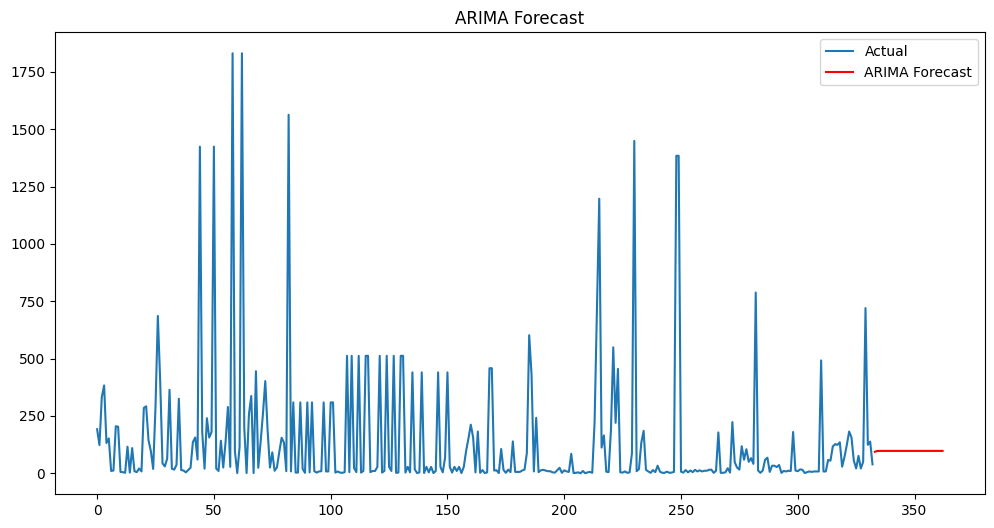

                                     SARIMAX Results                                      
Dep. Variable:                      Delay_Minutes   No. Observations:                  333
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2271.942
Date:                            Wed, 09 Apr 2025   AIC                           4553.885
Time:                                    05:44:45   BIC                           4572.726
Sample:                                         0   HQIC                          4561.408
                                            - 333                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0893      0.049      1.819      0.069      -0.007       0.185
ma.L1         -0.9996      0.830   

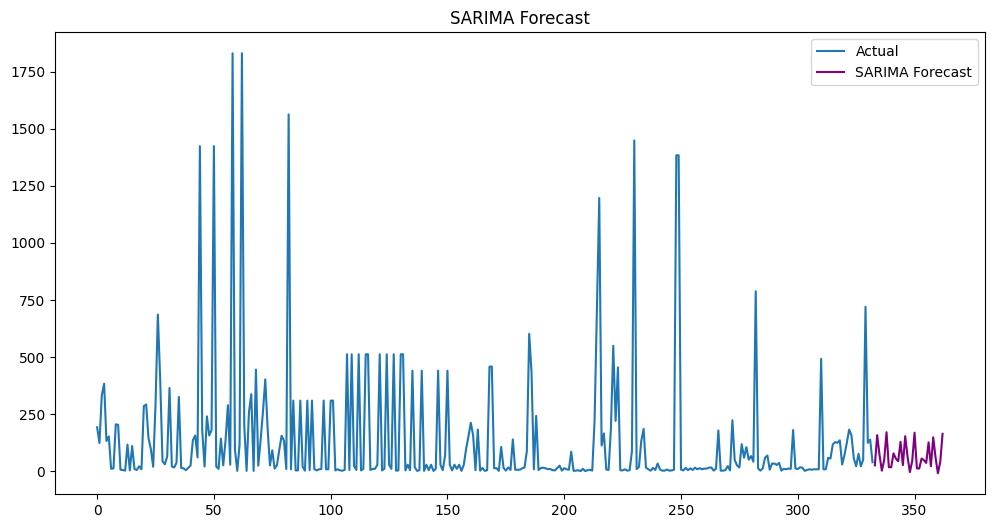

In [ ]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# --- Load Data ---
file_path = '/content/Train Delayed datsets-1.csv'
df = pd.read_csv(file_path)

# --- Check columns ---
print("Columns in CSV:", df.columns)

# --- PREPROCESSING ---

# Suppose your 'Delay' info is inside a messy column. Example: 'Delay_Info'
# Let's assume your delay column is the first column or known
delay_column = df.columns[0]  # update here if different

# Extract only the number from text (first number it finds)
df['Delay_Minutes'] = df[delay_column].str.extract(r'(\d+)').astype(float)

# Drop missing values
df = df.dropna(subset=['Delay_Minutes'])

# Reset index
df = df.reset_index(drop=True)

print(df.head())

# --- EDA and Visualization ---

# Plot delay distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Delay_Minutes'], kde=True, color='skyblue')
plt.title('Distribution of Delay Minutes')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(df['Delay_Minutes'], color='lightgreen')
plt.title('Boxplot of Delay Minutes')
plt.show()

# Line plot to check trend
plt.figure(figsize=(12,6))
plt.plot(df['Delay_Minutes'])
plt.title('Delay Minutes over Time')
plt.xlabel('Index')
plt.ylabel('Delay (minutes)')
plt.show()

# --- Check Stationarity ---

result = adfuller(df['Delay_Minutes'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p-value > 0.05, differencing needed
if result[1] > 0.05:
    df['Delay_Diff'] = df['Delay_Minutes'].diff().dropna()
else:
    df['Delay_Diff'] = df['Delay_Minutes']

# ACF and PACF plots
fig, axes = plt.subplots(1,2, figsize=(16,6))
plot_acf(df['Delay_Diff'].dropna(), lags=30, ax=axes[0])
plot_pacf(df['Delay_Diff'].dropna(), lags=30, ax=axes[1])
axes[0].set_title('ACF Plot')
axes[1].set_title('PACF Plot')
plt.show()

# --- ARIMA Modeling ---

# Fit ARIMA model manually
p, d, q = 1, 1, 1  # you can tune after checking ACF/PACF
arima_model = ARIMA(df['Delay_Minutes'], order=(p,d,q))
arima_result = arima_model.fit()

print(arima_result.summary())

# Forecast future delays
forecast_steps = 30
forecast_arima = arima_result.forecast(steps=forecast_steps)

# Plot actual + forecast
plt.figure(figsize=(12,6))
plt.plot(df['Delay_Minutes'], label='Actual')
plt.plot(np.arange(len(df), len(df)+forecast_steps), forecast_arima, label='ARIMA Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()

# --- SARIMA Modeling ---

# Fit SARIMA model
sarima_model = SARIMAX(df['Delay_Minutes'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()

print(sarima_result.summary())

# Forecast future delays with SARIMA
forecast_sarima = sarima_result.forecast(steps=forecast_steps)

# Plot actual + SARIMA forecast
plt.figure(figsize=(12,6))
plt.plot(df['Delay_Minutes'], label='Actual')
plt.plot(np.arange(len(df), len(df)+forecast_steps), forecast_sarima, label='SARIMA Forecast', color='purple')
plt.legend()
plt.title('SARIMA Forecast')
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 0.0300 - val_loss: 0.0061
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0322 - val_loss: 0.0066
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0261 - val_loss: 0.0080
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0275 - val_loss: 0.0080
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0298 - val_loss: 0.0090
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0223 - val_loss: 0.0081
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0280 - val_loss: 0.0072
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0249 - val_loss: 0.0075
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0306 - val_loss: 0.0072
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0207 - val_loss: 0.0069
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0288 - val_loss: 0.0069
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0296 - val_loss: 0.0072


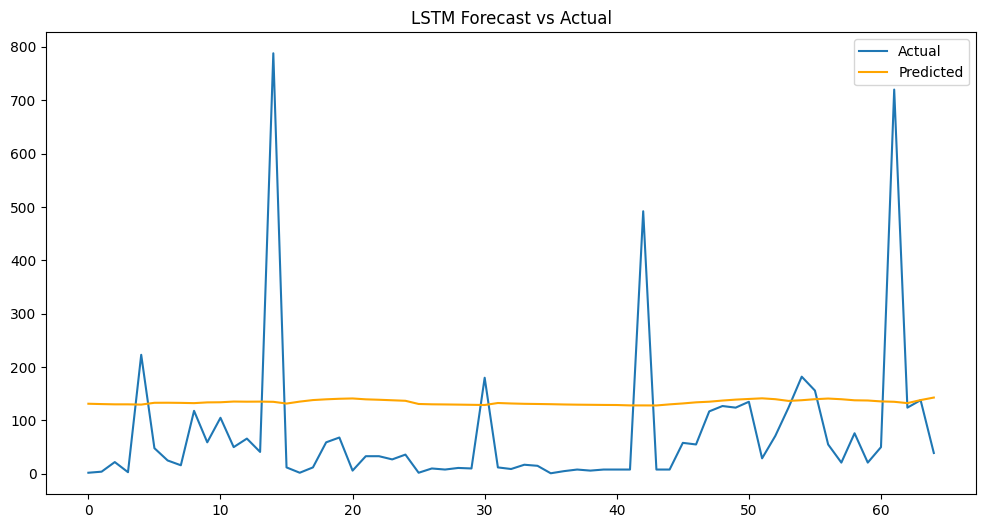

In [3]:
# --- Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# --- Load Data ---
file_path = '/content/Train Delayed datsets-1.csv'
df = pd.read_csv(file_path)

# --- Extract Delay Info ---
delay_column = df.columns[0]
df['Delay_Minutes'] = df[delay_column].str.extract(r'(\d+)').astype(float)
df.dropna(subset=['Delay_Minutes'], inplace=True)
df.reset_index(drop=True, inplace=True)

# --- Scaling ---
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Delay_Minutes']])

# --- Sequence Creation ---
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

SEQ_LEN = 10
X, y = create_sequences(scaled_data, SEQ_LEN)

# --- Train-Test Split ---
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# --- LSTM Model ---
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(SEQ_LEN, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# --- Train ---
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# --- Predict ---
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# --- Plot Results ---
plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted', color='orange')
plt.legend()
plt.title("LSTM Forecast vs Actual")
plt.show()
